In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


In [ ]:
# input
dir = '../input/att-database-of-faces/'

data visualisation

In [ ]:
img = cv2.imread(dir + 's23/3.pgm', 0)
img_shape = img.shape
plt.imshow(img, cmap = 'gray')
plt.title('Random image')
plt.show()

Creating dataframe

In [ ]:
filepaths = [] # list of filepaths for images

for img_folder in os.listdir(dir):
    if img_folder != 'README':
        img_folder_path = os.path.join(dir,img_folder)
        for img_name in os.listdir(img_folder_path):
            filepaths.append(os.path.join(img_folder_path, img_name))

In [ ]:
df = pd.DataFrame(filepaths , columns=['filepaths'])
df.head(10)

Converting to numpy array

In [ ]:
images = []
for filepath in df['filepaths']:
    images.append(cv2.imread(filepath,0).flatten())

images = np.array(images)    

In [ ]:
images.shape

Using PCA from sklearn

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.92)
pca.fit(images)

In [ ]:
z = pca.components_

fig, axes = plt.subplots(8, 11, figsize = (15,15))

for (ax,i) in zip(axes.flat, range(z.shape[0])):
    ax.imshow(z[i].reshape(img_shape), cmap = 'gray')
    ax.axis('off')
fig.tight_layout(pad = 0)    

These images are the vector spaces for the original dataset of images. Dimensionality is reduced from 10304 to 44

Reconstruction 

In [ ]:
components = pca.transform(images)
projections = pca.inverse_transform(components)

fig, axes = plt.subplots(5, 10, figsize = (15,15))
for (ax,i) in zip(axes.flat, range(projections.shape[0])):
    ax.imshow(projections[i].reshape(img_shape), cmap = 'gray')
    ax.axis('off')
    if i >= 49:
        break

fig.tight_layout(pad = 0)        

In [ ]:
fig, axes = plt.subplots(5, 10, figsize = (15,15))
for (ax,i) in zip(axes.flat, range(images.shape[0])):
    ax.imshow(images[i].reshape(img_shape), cmap = 'gray')
    ax.axis('off')
    if i >= 49:
        break

fig.tight_layout(pad = 0)

Applying PCA from scratch

In [21]:
mean = np.mean(images, axis = 0)
# mean normalisation
X = images - mean

# reduced dimensionality
k = 200
# covariance matrix of X
sigma = np.cov(X)
# svd 
u,s,v = np.linalg.svd(sigma)

print(u.shape)
# taking top k eigen vectors
u_reduced = u[:, 0:k]
print(u_reduced.shape)
# computing k orthonormal basis image
z = np.dot(u_reduced.T, X)
print(z.shape)

(400, 400)
(400, 200)
(200, 10304)


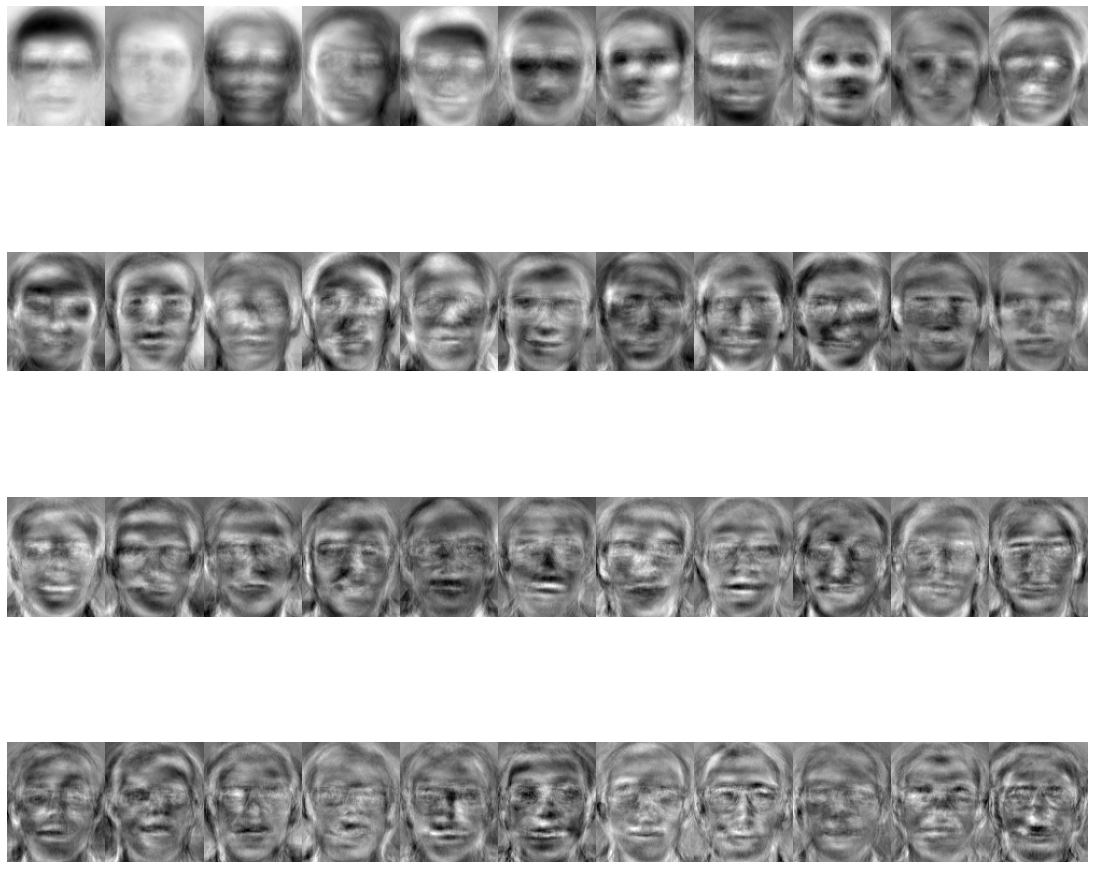

In [22]:
# displaying basis image vectors
fig, axes = plt.subplots(4, 11, figsize = (15,15))
for (ax,i) in zip(axes.flat, range(z.shape[0])):
    ax.imshow(z[i].reshape(img_shape), cmap = 'gray')
    ax.axis('off')
fig.tight_layout(pad = 0)    

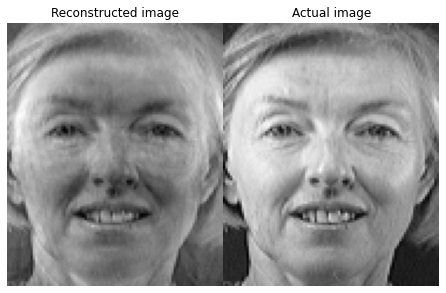

In [23]:
# reconstructing 0th image

image_0 = np.dot(u_reduced[0], z)

# display
image_0 = image_0.reshape(img_shape)
plt.subplot(1,2,1)
plt.axis('off')
plt.title('Reconstructed image')
plt.imshow(image_0, cmap = 'gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.title('Actual image')
plt.imshow(images[0].reshape(img_shape), cmap = 'gray')
plt.tight_layout(pad = 0)
plt.show()

In [24]:
# eigen values
print(s.shape)
print(s)

[9.33738883e+04 4.63759038e+04 4.04195810e+04 3.41847539e+04
 2.23053082e+04 1.72464020e+04 1.46362896e+04 1.34013801e+04
 1.12854729e+04 9.49895740e+03 8.77021196e+03 7.18821299e+03
 6.62906603e+03 6.05561139e+03 5.67471663e+03 5.45572587e+03
 5.26381619e+03 4.57551016e+03 4.54154304e+03 4.26224370e+03
 4.08846196e+03 3.69308819e+03 3.67076786e+03 3.29779107e+03
 3.15756342e+03 3.03938284e+03 2.97424711e+03 2.84512570e+03
 2.78168842e+03 2.66564477e+03 2.50321874e+03 2.47621096e+03
 2.38440131e+03 2.31569743e+03 2.23882073e+03 2.15433560e+03
 2.08997496e+03 2.05961487e+03 1.96433264e+03 1.84391083e+03
 1.81288567e+03 1.77014457e+03 1.73767820e+03 1.67803257e+03
 1.65557528e+03 1.58324687e+03 1.56628519e+03 1.53553057e+03
 1.50950255e+03 1.46278899e+03 1.36784077e+03 1.34972645e+03
 1.33571125e+03 1.32251636e+03 1.27642530e+03 1.25203949e+03
 1.24224540e+03 1.20104538e+03 1.18780863e+03 1.16189107e+03
 1.12388940e+03 1.11386981e+03 1.06147854e+03 1.04104794e+03
 1.03073216e+03 1.017084